In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Application of A/B TESTING to Observational Studies: The case of Kristen Gilbert

[Kristen Gilbert](https://en.wikipedia.org/wiki/Kristen_Gilbert) was a former nurse who was convicted of four murders and two attempted murders of patients admitted to the Veterans Affairs Medical Center in Northampton, Massachusetts.

We are going to construct a data that documents 1,641 nurse shifts that were tracked, out of which Kristen Gilbert was present 257 of those shifts(and not present 1384 of these shifts). Out of the 257 shifts when she was present, there was at a least a death on 40 of those shifts. Out of the 1,384 shifts when she was not present, there was at least a death 34 of those times.


### Construct table of the data

In [3]:
Gilbert_present = np.append(
    np.repeat('Yes', 257), 
    np.repeat('No', 1384)
)

Gilbert_present

array(['Yes', 'Yes', 'Yes', ..., 'No', 'No', 'No'],
      dtype='<U3')

In [4]:
Deaths = np.append(
    np.append(np.repeat(1, 40), np.repeat(0, 217)),
    np.append(np.repeat(1, 34), np.repeat(0, 1350))
)

Deaths   

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
Gilbert = Table().with_columns(
    'Gilbert present', Gilbert_present,
    'Deaths', Deaths
)

Gilbert

**_In this example..._**

## Step 1: Setting up the null and alternative hypotheses for this application problem:

**Null Hypothesis:**

There is no association between Ms. Gilbert’s presence and whether there was a death on the shift. 


**Alternative Hypothesis:**

There is an association between Ms. Gilbert’s presence and whether there was a death on the shift. 

## Step 2: Define The Test Statistic and Compute the Observed Value of the Test Statistic

Because we are comparing the rate of deaths while Ms. Kristen Gilbert was present to when she was not present, it makes natural sense that the test statistic should be the difference between the proportions of death when she was present and when she was not present. 

#### Compute the Observed Value of the Test Statistic

In [14]:
Gilbert_summary = Gilbert.group('Gilbert present', np.mean)
Gilbert_summary

Gilbert present,Deaths mean
No,0.0245665
Yes,0.155642


In [15]:
obs_diff_prop = Gilbert_summary.column(1).item(0) - Gilbert_summary.column(1).item(1)
obs_diff_prop

-0.1310755493578642

In [16]:
def difference_of_props(table, group_label, outcome):
    """Takes: name of table, column label of binary categorical variable,
    column label of group-label variable
    Returns: Difference of proportions of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(outcome, group_label)  
    
    # table containing counts for each group
    summary_table = reduced.group(group_label, np.mean)
    
    return summary_table.column(1).item(0) - summary_table.column(1).item(1)

In [17]:
difference_of_props(Gilbert, 'Gilbert present', 'Deaths')

-0.1310755493578642

## Step 3: The Distribution of the Test Statistic, Under the Null Hypothesis

Recall the null hypothesis: 

**Null Hypothesis:**


There is no association between Ms. Gilbert’s presence and whether there was a death on the shift. 


**How should we simulate test statistic under the null hypothesis?**

## Use the permutation test to conduct the simulation.

In [18]:
shuffled_labels = Gilbert.sample(with_replacement=False).column('Gilbert present')
shuffled_labels

array(['No', 'Yes', 'No', ..., 'No', 'Yes', 'Yes'],
      dtype='<U3')

In [19]:
original_and_shuffled = Gilbert.with_column(
    'Shuffled Label', shuffled_labels
)

original_and_shuffled

Gilbert present,Deaths,Shuffled Label
Yes,1,No
Yes,1,Yes
Yes,1,No
Yes,1,No
Yes,1,No
Yes,1,No
Yes,1,No
Yes,1,No
Yes,1,Yes
Yes,1,Yes


In [20]:
difference_of_props(original_and_shuffled, 'Shuffled Label', 'Deaths')

-0.0018949191426193765

#### Lets use the old simulation function again for the permutation test.

In [21]:
def one_simulated_difference(table, group_label, outcome):
    """Takes: name of table, column label of binary cateogorcial variable,
    column label of group-label variable
    Returns: Difference of proportions of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # table of outcome variable and shuffled labels
    shuffled_table = table.select(outcome).with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_props(shuffled_table, 'Shuffled Label', outcome)  

In [27]:
one_simulated_difference(Gilbert, 'Gilbert present', 'Deaths')

0.011945862666156853

### Simulate many outcomes

In [28]:
differences = make_array()

for i in np.arange(1000):
    new_difference = one_simulated_difference(Gilbert, 'Gilbert present', 'Deaths')
    differences = np.append(differences, new_difference)

### Use simulation to make a decision

Observed Difference: -0.1310755493578642


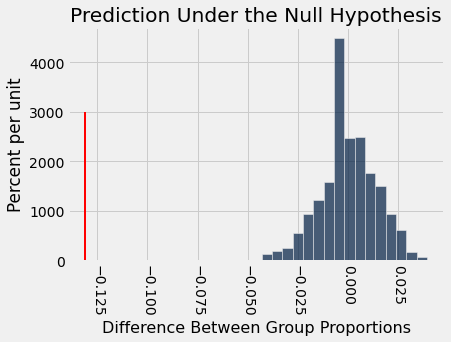

In [29]:
Table().with_column('Difference Between Group Proportions', differences).hist(bins=17)
print('Observed Difference:', obs_diff_prop)
plots.title('Prediction Under the Null Hypothesis');
plots.plot([obs_diff_prop, obs_diff_prop], [0, 30], color='red', lw=2);
plots.xticks(rotation = 270);

In [30]:
p_value = sum(differences<= obs_diff_prop)/1000
p_value

0.0

## Step 4. The Conclusion of the Test

The p-value of a test is the chance, based on the model in the null hypothesis, that the test statistic will be equal to the observed value in the sample or even further in the direction that supports the alternative.


IN THIS EXAMPLE, since the p-value above is smaller than a chosen p-value cut-off of 0.01, we REJECT the null hypothesis in favor of the alternative hypothesis. This means that the results of the hypothesis testing procedure provides a HIGHLY statistically significant evidence to state that there is an association between Ms. Gilbert’s presence and whether there was a death on the shift. 


Formally, we say that `the result of the test is statistically significant.` 

## Types of Errors in Hypothesis testing.

See Class 22 Lecture slides.

**Example:**  For each of the following scenarios, indicate which type of statistical error could have been committed or, alternatively, that no statistical error was made. When warranted, provide a definition for the indicated statistical error.

- a.	Unknown to the statistical analyst, the null hypothesis is actually true.



- b.	The statistical analyst fails to reject the null hypothesis.




- c.	The statistical analyst rejects the null hypothesis.




- d.	Unknown to the statistical analyst, the null hypothesis is actually true, and the analyst fails to reject the null hypothesis.



- e.	Unknown to the statistical analyst, the null hypothesis is actually false.



- f.	Unknown to the statistical analyst, the null hypothesis is actually false, and the analyst rejects the null hypothesis.
